In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
sys.path.append('../..')
# %matplotlib
# %matplotlib inline
import numpy
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
import random

In [2]:
import gillespy2
from gillespy2.solvers.numpy.basic_tau_hybrid_solver import BasicTauHybridSolver
from gillespy2.solvers.numpy.ssa_solver import NumPySSASolver
from gillespy2.solvers.numpy.basic_ode_solver import BasicODESolver

In [15]:
class AutomaticSwitchExample(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Automatic Switch Example")
            
            #parameters
            k1 = gillespy2.Parameter(name='k1', expression= .01)
            k2 = gillespy2.Parameter(name='k2', expression= 2)
            k3 = gillespy2.Parameter(name='k3', expression = .02)
            self.add_parameter([k1,k2,k3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=1e4)
            B = gillespy2.Species(name='B', initial_value=1e4)
            C = gillespy2.Species(name='C', initial_value=0)
            #DET = gillespy2.Species(name='DET', initial_value=1) #Create a deterministic species
            #Deterministic species will be a regular species, but with "deterministic" flag
            #DET = gillespy2.Species(name='DET', initial_value=0, continuous=True)
            self.add_species([A, B, C])
            
            #rate_rules
            #rate_rule1 = gillespy2.RateRule(name='rate_rule1', expression="sin(t)", species=DET)
            #self.add_rate_rule(rate_rule1)
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={B:1,C:1},
                   rate=k1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={B:1}, products={},
                    rate=k2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={A:1},
                    rate=k3)
            #r4 = gillespy2.Reaction(name="r4", reactants={C:1}, products={D:1}, propensity_function="rate2*A*DET/vol")
            #r4 uses a deterministic species result as an argument
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,30,101))

In [16]:
model = AutomaticSwitchExample()
solvers = [BasicTauHybridSolver]
results = {}

In [17]:
for solver in solvers:
    results[solver] = model.run(solver=solver, show_labels=True)

Initializing: is_det:
{'A': False, 'B': False, 'C': False}
propensity of  r1
1000000.0
propensity of  r2
20000.0
propensity of  r3
0.0
Calculating mean, standard deviation at time 9.946363773202637e-07
mean: {'A': 9999.00536362268, 'B': 9999.980107272453, 'C': 0.9946363773202637}
standard deviation: {'A': 0.9973145829277057, 'B': 99.9999005363128, 'C': 0.9973145829277057}
CV: {'A': 9.974137893315167e-05, 'B': 0.010000009946378612, 'C': 1.0026926479550824}
is_det: {'A': True, 'B': True, 'C': False}
propensity of  r1
999900.0000000001
propensity of  r2
20000.0
propensity of  r3
0.02
Calculating mean, standard deviation at time 2.3534369805032105e-06
mean: {'A': 9997.641335304053, 'B': 9999.972823987937, 'C': 2.3586646959466164}
standard deviation: {'A': 1.5357944836294395, 'B': 99.99986411984737, 'C': 1.5357944836294395}
CV: {'A': 0.0001536156811513315, 'B': 0.010000013588033728, 'C': 0.6511287875163919}
is_det: {'A': True, 'B': True, 'C': False}
propensity of  r1
999900.0000000001
prope

129.04
Species A adding to mu_i: 1 * 347491.12000000005 = 347491.12000000005
Species A adding to sigma_i: 1 ** 2 * 347491.12000000005 = 347491.12000000005
Species B adding to mu_i: 1 * 347491.12000000005 = 347491.12000000005
Species B adding to sigma_i: 1 ** 2 * 347491.12000000005 = 347491.12000000005
Species B adding to mu_i: 1 * 19588.0 = 19588.0
Species B adding to sigma_i: 1 ** 2 * 19588.0 = 19588.0
Species C adding to mu_i: 1 * 129.04 = 129.04
Species C adding to sigma_i: 1 ** 2 * 129.04 = 129.04
Calculating mean, standard deviation at time 0.010709043638924096
mean: {'A': 3512.543173578867, 'B': 9792.000563803806, 'C': 6487.456826421133}
standard deviation: {'A': 80.54475045849439, 'B': 98.95453786362607, 'C': 80.54475045849439}
CV: {'A': 0.02293060796073541, 'B': 0.01010565075224895, 'C': 0.012415458416688634}
is_det: {'A': True, 'B': True, 'C': True}
propensity of  r1
343041.6
propensity of  r2
19580.0
propensity of  r3
129.92000000000002
Species A adding to mu_i: 1 * 343041.6 

19198.0
propensity of  r3
171.82
Species A adding to mu_i: 1 * 135249.91 = 135249.91
Species A adding to sigma_i: 1 ** 2 * 135249.91 = 135249.91
Species B adding to mu_i: 1 * 135249.91 = 135249.91
Species B adding to sigma_i: 1 ** 2 * 135249.91 = 135249.91
Species B adding to mu_i: 1 * 19198.0 = 19198.0
Species B adding to sigma_i: 1 ** 2 * 19198.0 = 19198.0
Species C adding to mu_i: 1 * 171.82 = 171.82
Species C adding to sigma_i: 1 ** 2 * 171.82 = 171.82
Calculating mean, standard deviation at time 0.020090977380728445
mean: {'A': 1394.9378918061711, 'B': 9597.001420118502, 'C': 8605.062108193828}
standard deviation: {'A': 92.76347399808735, 'B': 97.96428645235213, 'C': 92.76347399808735}
CV: {'A': 0.06650007469363158, 'B': 0.01020780160009005, 'C': 0.010780105109265513}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
133028.28
propensity of  r2
19196.0
propensity of  r3
172.28
Species A adding to mu_i: 1 * 133028.28 = 133028.28
Species A adding to sigma_i: 1 ** 2 * 1330

propensity of  r2
18862.0
propensity of  r3
188.9
Species A adding to mu_i: 1 * 52342.049999999996 = 52342.049999999996
Species A adding to sigma_i: 1 ** 2 * 52342.049999999996 = 52342.049999999996
Species B adding to mu_i: 1 * 52342.049999999996 = 52342.049999999996
Species B adding to sigma_i: 1 ** 2 * 52342.049999999996 = 52342.049999999996
Species B adding to mu_i: 1 * 18862.0 = 18862.0
Species B adding to sigma_i: 1 ** 2 * 18862.0 = 18862.0
Species C adding to mu_i: 1 * 188.9 = 188.9
Species C adding to sigma_i: 1 ** 2 * 188.9 = 188.9
Calculating mean, standard deviation at time 0.029642035740963836
mean: {'A': 549.4800055900705, 'B': 9429.003607940074, 'C': 9450.51999440993}
standard deviation: {'A': 97.2137850019735, 'B': 97.10305663541223, 'C': 97.2137850019735}
CV: {'A': 0.1769196040128493, 'B': 0.01029833699009752, 'C': 0.010286606986650085}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
51964.81
propensity of  r2
18862.0
propensity of  r3
188.98
Species A addin

Calculating mean, standard deviation at time 0.040016164089911946
mean: {'A': 221.79115017913878, 'B': 9214.008955263898, 'C': 9778.208849820861}
standard deviation: {'A': 98.88482618592633, 'B': 95.98962941518161, 'C': 98.88482618592633}
CV: {'A': 0.44584658182284514, 'B': 0.010417792068711134, 'C': 0.01011277501888681}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
20639.36
propensity of  r2
18428.0
propensity of  r3
195.52
Species A adding to mu_i: 1 * 20639.36 = 20639.36
Species A adding to sigma_i: 1 ** 2 * 20639.36 = 20639.36
Species B adding to mu_i: 1 * 20639.36 = 20639.36
Species B adding to sigma_i: 1 ** 2 * 20639.36 = 20639.36
Species B adding to mu_i: 1 * 18428.0 = 18428.0
Species B adding to sigma_i: 1 ** 2 * 18428.0 = 18428.0
Species C adding to mu_i: 1 * 195.52 = 195.52
Species C adding to sigma_i: 1 ** 2 * 195.52 = 195.52
Calculating mean, standard deviation at time 0.040124208627360464
mean: {'A': 221.79115476352854, 'B': 9212.008955263898, 'C': 9778.2088

propensity of  r3
198.6
Species A adding to mu_i: 1 * 6288.1 = 6288.1
Species A adding to sigma_i: 1 ** 2 * 6288.1 = 6288.1
Species B adding to mu_i: 1 * 6288.1 = 6288.1
Species B adding to sigma_i: 1 ** 2 * 6288.1 = 6288.1
Species B adding to mu_i: 1 * 17966.0 = 17966.0
Species B adding to sigma_i: 1 ** 2 * 17966.0 = 17966.0
Species C adding to mu_i: 1 * 198.6 = 198.6
Species C adding to sigma_i: 1 ** 2 * 198.6 = 198.6
Calculating mean, standard deviation at time 0.05196346369989582
mean: {'A': 69.03158346718405, 'B': 8980.142857142857, 'C': 9930.968416532816}
standard deviation: {'A': 99.65424434780897, 'B': 94.76361568209002, 'C': 99.65424434780897}
CV: {'A': 1.4436036281158493, 'B': 0.010552573293053405, 'C': 0.01003469552696464}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
6288.1
propensity of  r2
17966.0
propensity of  r3
198.6
Species A adding to mu_i: 1 * 6288.1 = 6288.1
Species A adding to sigma_i: 1 ** 2 * 6288.1 = 6288.1
Species B adding to mu_i: 1 * 6288.1 =

propensity of  r2
15712.0
propensity of  r3
199.96
Calculating mean, standard deviation at time 0.11712888558519172
mean: {'A': 2.005311623516918, 'B': 7854.051908760555, 'C': 9997.994688376484}
standard deviation: {'A': 99.98997293917267, 'B': 88.62308902741178, 'C': 99.98997293917267}
CV: {'A': 49.862560894057026, 'B': 0.011283741189507538, 'C': 0.010001002806634763}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
157.12
propensity of  r2
15712.0
propensity of  r3
199.96
Calculating mean, standard deviation at time 0.11712888568519171
mean: {'A': 2.0000000042840003, 'B': 7855.9999984288, 'C': 9997.999999995716}
standard deviation: {'A': 99.98999949992857, 'B': 88.63407921577794, 'C': 99.98999949992857}
CV: {'A': 49.99499964287499, 'B': 0.011282342061291339, 'C': 0.010001000150027146}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
157.1
propensity of  r2
15710.0
propensity of  r3
199.96
Calculating mean, standard deviation at time 0.1171993845357306
mean: {'

propensity of  r3
199.98000000000002
Calculating mean, standard deviation at time 0.1243312498813029
mean: {'A': 1.0137385943679709, 'B': 7744.262828077468, 'C': 9998.986261405633}
standard deviation: {'A': 99.9949311785634, 'B': 88.00149332867862, 'C': 99.9949311785634}
CV: {'A': 98.6397595337747, 'B': 0.01136344353004419, 'C': 0.010000506907837912}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
77.45
propensity of  r2
15490.0
propensity of  r3
199.98000000000002
Calculating mean, standard deviation at time 0.12437389796308237
mean: {'A': 1.0052256694604405, 'B': 7744.339381213235, 'C': 9998.99477433054}
standard deviation: {'A': 99.99497374533652, 'B': 88.0019282812214, 'C': 99.99497374533652}
CV: {'A': 99.47514949455011, 'B': 0.011363387365835578, 'C': 0.010000502650730854}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
77.45
propensity of  r2
15490.0
propensity of  r3
199.98000000000002
Calculating mean, standard deviation at time 0.12437389806308237
mea

propensity of  r3
199.96
Calculating mean, standard deviation at time 0.15966328436980648
mean: {'A': 2.0004311759431883, 'B': 7213.888272153227, 'C': 9997.999568824056}
standard deviation: {'A': 99.98999734385463, 'B': 84.93461174428965, 'C': 99.98999734385463}
CV: {'A': 49.984222674749155, 'B': 0.011773763127459426, 'C': 0.010001000365677675}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
144.26
propensity of  r2
14426.0
propensity of  r3
199.96
Calculating mean, standard deviation at time 0.1597249731718872
mean: {'A': 2.0034360662758957, 'B': 7212.110077341184, 'C': 9997.996563933724}
standard deviation: {'A': 99.98998231789885, 'B': 84.92414307687292, 'C': 99.98998231789885}
CV: {'A': 49.909245421425446, 'B': 0.011775214488709116, 'C': 0.010001001868574125}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
144.24
propensity of  r2
14424.0
propensity of  r3
199.96
Calculating mean, standard deviation at time 0.1597625829674123
mean: {'A': 2.0020956178066593

Species B adding to sigma_i: 1 ** 2 * 585.0 = 585.0
Species B adding to mu_i: 1 * 11700.0 = 11700.0
Species B adding to sigma_i: 1 ** 2 * 11700.0 = 11700.0
Species C adding to mu_i: 1 * 199.8 = 199.8
Species C adding to sigma_i: 1 ** 2 * 199.8 = 199.8
Calculating mean, standard deviation at time 0.26777228822773624
mean: {'A': 9.341538461538462, 'B': 5830.0, 'C': 9990.658461538462}
standard deviation: {'A': 99.95328139455184, 'B': 76.3544366752843, 'C': 99.95328139455184}
CV: {'A': 10.69987366707159, 'B': 0.01309681589627518, 'C': 0.010004674044193081}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
582.7
propensity of  r2
11654.0
propensity of  r3
199.8
Species A adding to mu_i: 1 * 582.7 = 582.7
Species A adding to sigma_i: 1 ** 2 * 582.7 = 582.7
Species B adding to mu_i: 1 * 582.7 = 582.7
Species B adding to sigma_i: 1 ** 2 * 582.7 = 582.7
Species B adding to mu_i: 1 * 11654.0 = 11654.0
Species B adding to sigma_i: 1 ** 2 * 11654.0 = 11654.0
Species C adding to mu_i: 1 

propensity of  r1
105.68
propensity of  r2
10568.0
propensity of  r3
199.96
Calculating mean, standard deviation at time 0.31170745294153707
mean: {'A': 2.003206432351252, 'B': 5283.64058573305, 'C': 9997.996793567649}
standard deviation: {'A': 99.98998346618349, 'B': 72.68865513773831, 'C': 99.98998346618349}
CV: {'A': 49.914967250190394, 'B': 0.013757305016925847, 'C': 0.010001001753722651}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
105.68
propensity of  r2
10568.0
propensity of  r3
199.96
Calculating mean, standard deviation at time 0.3117074530415371
mean: {'A': 2.000000009428, 'B': 5283.9999989432, 'C': 9997.999999990572}
standard deviation: {'A': 99.98999949990285, 'B': 72.69112737427588, 'C': 99.98999949990285}
CV: {'A': 49.994999514274994, 'B': 0.013756837128844457, 'C': 0.010001000150029719}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
105.66
propensity of  r2
10566.0
propensity of  r3
199.96
Calculating mean, standard deviation at time 0.3118

322.00000000000006
propensity of  r2
9200.0
propensity of  r3
199.86
Species A adding to mu_i: 1 * 322.00000000000006 = 322.00000000000006
Species A adding to sigma_i: 1 ** 2 * 322.00000000000006 = 322.00000000000006
Species B adding to mu_i: 1 * 322.00000000000006 = 322.00000000000006
Species B adding to sigma_i: 1 ** 2 * 322.00000000000006 = 322.00000000000006
Species B adding to mu_i: 1 * 9200.0 = 9200.0
Species B adding to sigma_i: 1 ** 2 * 9200.0 = 9200.0
Species C adding to mu_i: 1 * 199.86 = 199.86
Species C adding to sigma_i: 1 ** 2 * 199.86 = 199.86
Calculating mean, standard deviation at time 0.3831838764408817
mean: {'A': 6.620683229813665, 'B': 4571.428571428572, 'C': 9993.379316770186}
standard deviation: {'A': 99.96689110285558, 'B': 67.61234037828133, 'C': 99.96689110285558}
CV: {'A': 15.099180497368259, 'B': 0.01479019945774904, 'C': 0.010003311986276572}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
411.03
propensity of  r2
9134.0
propensity of  r3
199.8

propensity of  r2
7746.0
propensity of  r3
199.98000000000002
Calculating mean, standard deviation at time 0.46610433177398325
mean: {'A': 1.013358755812889, 'B': 3872.358282650998, 'C': 9998.986641244186}
standard deviation: {'A': 99.99493307785244, 'B': 62.22827558795919, 'C': 99.99493307785244}
CV: {'A': 98.67673467491699, 'B': 0.01606986519474588, 'C': 0.010000506717889759}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
38.730000000000004
propensity of  r2
7746.0
propensity of  r3
199.98000000000002
Calculating mean, standard deviation at time 0.46610433187398326
mean: {'A': 1.000000016125, 'B': 3872.9999992254, 'C': 9998.999999983875}
standard deviation: {'A': 99.99499987491312, 'B': 62.2334315237831, 'C': 99.99499987491312}
CV: {'A': 99.99499826249377, 'B': 0.016068533833263565, 'C': 0.01000050003751119}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
38.72
propensity of  r2
7744.0
propensity of  r3
199.98000000000002
Calculating mean, standard deviatio

propensity of  r3
199.96
Calculating mean, standard deviation at time 0.509801041213899
mean: {'A': 2.026287626970803, 'B': 3563.5432086094993, 'C': 9997.973712373028}
standard deviation: {'A': 99.98986804858295, 'B': 59.69542033196097, 'C': 99.98986804858295}
CV: {'A': 49.346335000852136, 'B': 0.016751703806407395, 'C': 0.010001013297808548}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
71.3
propensity of  r2
7130.0
propensity of  r3
199.96
Calculating mean, standard deviation at time 0.509801041313899
mean: {'A': 2.0000000128660003, 'B': 3564.999999287, 'C': 9997.999999987134}
standard deviation: {'A': 99.98999949988566, 'B': 59.70762094814195, 'C': 99.98999949988566}
CV: {'A': 49.99499942832499, 'B': 0.016748280774216966, 'C': 0.010001000150031438}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
71.28
propensity of  r2
7128.0
propensity of  r3
199.96
Calculating mean, standard deviation at time 0.509910830542503
mean: {'A': 2.0141276779367545, 'B': 3563.2

6828.0
propensity of  r3
199.96
Calculating mean, standard deviation at time 0.5286358902185778
mean: {'A': 2.010032595691186, 'B': 3413.47978004724, 'C': 9997.989967404308}
standard deviation: {'A': 99.9899493319419, 'B': 58.424992768910464, 'C': 99.9899493319419}
CV: {'A': 49.74543673882987, 'B': 0.017115962751682656, 'C': 0.010001005167831893}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
102.42
propensity of  r2
6828.0
propensity of  r3
199.94
Species A adding to mu_i: 1 * 102.42 = 102.42
Species A adding to sigma_i: 1 ** 2 * 102.42 = 102.42
Species B adding to mu_i: 1 * 102.42 = 102.42
Species B adding to sigma_i: 1 ** 2 * 102.42 = 102.42
Species B adding to mu_i: 1 * 6828.0 = 6828.0
Species B adding to sigma_i: 1 ** 2 * 6828.0 = 6828.0
Species C adding to mu_i: 1 * 199.94 = 199.94
Species C adding to sigma_i: 1 ** 2 * 199.94 = 199.94
Calculating mean, standard deviation at time 0.5335605553971217
mean: {'A': 3.4802533482116007, 'B': 3380.3743861609023, 'C': 9996.51

propensity of  r2
5998.0
propensity of  r3
199.96
Calculating mean, standard deviation at time 0.5947969328712085
mean: {'A': 2.01610680602488, 'B': 2998.3098398161364, 'C': 9997.983893193976}
standard deviation: {'A': 99.98991895783283, 'B': 54.75682459580848, 'C': 99.98991895783283}
CV: {'A': 49.595546554887676, 'B': 0.018262563751305402, 'C': 0.010001008205854376}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
59.980000000000004
propensity of  r2
5998.0
propensity of  r3
199.96
Calculating mean, standard deviation at time 0.5947969329712085
mean: {'A': 2.000000013998, 'B': 2998.9999994002, 'C': 9997.999999986001}
standard deviation: {'A': 99.98999949987999, 'B': 54.76312627489596, 'C': 99.98999949987999}
CV: {'A': 49.99499940002499, 'B': 0.018260462249365984, 'C': 0.010001000150032005}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
59.96
propensity of  r2
5996.0
propensity of  r3
199.96
Calculating mean, standard deviation at time 0.5949064264013787
mean:

standard deviation: {'A': 99.96784453467737, 'B': 42.84868390313574, 'C': 99.96784453467737}
CV: {'A': 15.546955809657005, 'B': 0.023337939673027348, 'C': 0.0100032165808388}
is_det: {'A': False, 'B': True, 'C': True}
propensity of  r1
128.73000000000002
propensity of  r2
3678.0
propensity of  r3
199.86
Species A adding to mu_i: 1 * 128.73000000000002 = 128.73000000000002
Species A adding to sigma_i: 1 ** 2 * 128.73000000000002 = 128.73000000000002
Species B adding to mu_i: 1 * 128.73000000000002 = 128.73000000000002
Species B adding to sigma_i: 1 ** 2 * 128.73000000000002 = 128.73000000000002
Species B adding to mu_i: 1 * 3678.0 = 3678.0
Species B adding to sigma_i: 1 ** 2 * 3678.0 = 3678.0
Species C adding to mu_i: 1 * 199.86 = 199.86
Species C adding to sigma_i: 1 ** 2 * 199.86 = 199.86
Calculating mean, standard deviation at time 0.8522056573846365
mean: {'A': 7.343436267348131, 'B': 1821.2415493981946, 'C': 9992.656563732651}
standard deviation: {'A': 99.96327607543007, 'B': 42.67

199.70000000000002
Species A adding to mu_i: 1 * 131.1 = 131.1
Species A adding to sigma_i: 1 ** 2 * 131.1 = 131.1
Species B adding to mu_i: 1 * 131.1 = 131.1
Species B adding to sigma_i: 1 ** 2 * 131.1 = 131.1
Species B adding to mu_i: 1 * 1748.0 = 1748.0
Species B adding to sigma_i: 1 ** 2 * 1748.0 = 1748.0
Species C adding to mu_i: 1 * 199.70000000000002 = 199.70000000000002
Species C adding to sigma_i: 1 ** 2 * 199.70000000000002 = 199.70000000000002
Calculating mean, standard deviation at time 1.2325891293381819
mean: {'A': 15.318704420273376, 'B': 865.8790768711682, 'C': 9984.681295579727}
standard deviation: {'A': 99.9233771225719, 'B': 29.425823299801966, 'C': 99.9233771225719}
CV: {'A': 6.522965283560755, 'B': 0.033983756029919814, 'C': 0.010007668163310184}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
138.56
propensity of  r2
1732.0
propensity of  r3
199.68
Species A adding to mu_i: 1 * 138.56 = 138.56
Species A adding to sigma_i: 1 ** 2 * 138.56 = 138.56
Spe

propensity of  r2
792.0
propensity of  r3
199.28
Species A adding to mu_i: 1 * 142.56 = 142.56
Species A adding to sigma_i: 1 ** 2 * 142.56 = 142.56
Species B adding to mu_i: 1 * 142.56 = 142.56
Species B adding to sigma_i: 1 ** 2 * 142.56 = 142.56
Species B adding to mu_i: 1 * 792.0 = 792.0
Species B adding to sigma_i: 1 ** 2 * 792.0 = 792.0
Species C adding to mu_i: 1 * 199.28 = 199.28
Species C adding to sigma_i: 1 ** 2 * 199.28 = 199.28
Calculating mean, standard deviation at time 1.6280147102032634
mean: {'A': 36.23973104209294, 'B': 392.6525566759942, 'C': 9963.760268957907}
standard deviation: {'A': 99.81863688188648, 'B': 19.815462565279525, 'C': 99.81863688188648}
CV: {'A': 2.7543978393754016, 'B': 0.0504656399872386, 'C': 0.010018169264155363}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
145.41
propensity of  r2
786.0
propensity of  r3
199.26
Species A adding to mu_i: 1 * 145.41 = 145.41
Species A adding to sigma_i: 1 ** 2 * 145.41 = 145.41
Species B adding t

propensity of  r3
198.82
Species A adding to mu_i: 1 * 107.97 = 107.97
Species A adding to sigma_i: 1 ** 2 * 107.97 = 107.97
Species B adding to mu_i: 1 * 107.97 = 107.97
Species B adding to sigma_i: 1 ** 2 * 107.97 = 107.97
Species B adding to mu_i: 1 * 366.0 = 366.0
Species B adding to sigma_i: 1 ** 2 * 366.0 = 366.0
Species C adding to mu_i: 1 * 198.82 = 198.82
Species C adding to sigma_i: 1 ** 2 * 198.82 = 198.82
Calculating mean, standard deviation at time 2.0516931640888343
mean: {'A': 59.348848391517784, 'B': 181.5946228806218, 'C': 9940.651151608483}
standard deviation: {'A': 99.70281416092769, 'B': 13.475704912197426, 'C': 99.70281416092769}
CV: {'A': 1.6799452198836153, 'B': 0.0742076207898303, 'C': 0.010029807166585351}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
109.8
propensity of  r2
366.0
propensity of  r3
198.8
Species A adding to mu_i: 1 * 109.8 = 109.8
Species A adding to sigma_i: 1 ** 2 * 109.8 = 109.8
Species B adding to mu_i: 1 * 109.8 = 109.8
Spe

propensity of  r2
168.0
propensity of  r3
197.88
Species A adding to mu_i: 1 * 89.04 = 89.04
Species A adding to sigma_i: 1 ** 2 * 89.04 = 89.04
Species B adding to mu_i: 1 * 89.04 = 89.04
Species B adding to sigma_i: 1 ** 2 * 89.04 = 89.04
Species B adding to mu_i: 1 * 168.0 = 168.0
Species B adding to sigma_i: 1 ** 2 * 168.0 = 168.0
Species C adding to mu_i: 1 * 197.88 = 197.88
Species C adding to sigma_i: 1 ** 2 * 197.88 = 197.88
Calculating mean, standard deviation at time 2.434465175726863
mean: {'A': 106.4234360410831, 'B': 83.34640522875817, 'C': 9893.576563958917}
standard deviation: {'A': 99.46645949242848, 'B': 9.129425240876786, 'C': 99.46645949242848}
CV: {'A': 0.9346292808477921, 'B': 0.10953592078530021, 'C': 0.010053640243182891}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
90.72
propensity of  r2
168.0
propensity of  r3
197.84
Species A adding to mu_i: 1 * 90.72 = 90.72
Species A adding to sigma_i: 1 ** 2 * 90.72 = 90.72
Species B adding to mu_i: 1 * 90

mean: {'A': 161.76534318251768, 'B': 44.445983379501385, 'C': 9838.234656817482}
standard deviation: {'A': 99.18787555350443, 'B': 6.666782085796819, 'C': 99.18787555350443}
CV: {'A': 0.6131589968661709, 'B': 0.1499974031145311, 'C': 0.010081877390957677}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
74.25
propensity of  r2
90.0
propensity of  r3
196.70000000000002
Species A adding to mu_i: 1 * 74.25 = 74.25
Species A adding to sigma_i: 1 ** 2 * 74.25 = 74.25
Species B adding to mu_i: 1 * 74.25 = 74.25
Species B adding to sigma_i: 1 ** 2 * 74.25 = 74.25
Species B adding to mu_i: 1 * 90.0 = 90.0
Species B adding to sigma_i: 1 ** 2 * 90.0 = 90.0
Species C adding to mu_i: 1 * 196.70000000000002 = 196.70000000000002
Species C adding to sigma_i: 1 ** 2 * 196.70000000000002 = 196.70000000000002
Calculating mean, standard deviation at time 2.8940626491764405
mean: {'A': 165.7455098934551, 'B': 44.45205479452055, 'C': 9834.254490106545}
standard deviation: {'A': 99.167809747450

propensity of  r1
7.9
propensity of  r2
4.0
propensity of  r3
192.1
Calculating mean, standard deviation at time 4.261059957961377
mean: {'A': 395.00000001842, 'B': 1.9999999996, 'C': 9604.99999998158}
standard deviation: {'A': 98.00510190791896, 'B': 1.4142135622316736, 'C': 98.00510190791896}
CV: {'A': 0.24811418203379415, 'B': 0.7071067812572581, 'C': 0.010203550432910663}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
7.92
propensity of  r2
4.0
propensity of  r3
192.08
Calculating mean, standard deviation at time 4.263582917626905
mean: {'A': 396.4646282520034, 'B': 1.989908161337892, 'C': 9603.535371747996}
standard deviation: {'A': 97.99762941902215, 'B': 1.4106410462402872, 'C': 97.99762941902215}
CV: {'A': 0.24717874543080867, 'B': 0.7088975630372102, 'C': 0.010204328471295569}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
7.94
propensity of  r2
4.0
propensity of  r3
192.06
Calculating mean, standard deviation at time 4.264680452053551
mean: {'A':

Calculating mean, standard deviation at time 4.862044856773242
mean: {'A': 505.5538860937538, 'B': 0.0, 'C': 9494.446113906246}
standard deviation: {'A': 97.43944844828631, 'B': 0.0, 'C': 97.43944844828631}
CV: {'A': 0.19273800702269034, 'B': 1, 'C': 0.010262783871675202}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
189.92000000000002
Calculating mean, standard deviation at time 4.86260010749267
mean: {'A': 504.1054532166339, 'B': 0.0, 'C': 9495.894546783366}
standard deviation: {'A': 97.44688064162632, 'B': 0.0, 'C': 97.44688064162632}
CV: {'A': 0.1933065393755016, 'B': 1, 'C': 0.01026200113760061}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
189.92000000000002
Calculating mean, standard deviation at time 4.86260010759267
mean: {'A': 504.000000018992, 'B': 0.0, 'C': 9495.999999981008}
standard deviation: {'A': 97.44742172054121, 'B': 0.0, 'C': 97.44742172054121}
CV

0.0
propensity of  r2
0.0
propensity of  r3
187.6
Calculating mean, standard deviation at time 5.429311665171268
mean: {'A': 622.7049428658585, 'B': 0.0, 'C': 9377.29505713414}
standard deviation: {'A': 96.83643455401557, 'B': 0.0, 'C': 96.83643455401557}
CV: {'A': 0.15550933979799134, 'B': 1, 'C': 0.010326691648712014}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
187.58
Calculating mean, standard deviation at time 5.432007041768629
mean: {'A': 621.5055987421331, 'B': 0.0, 'C': 9378.494401257867}
standard deviation: {'A': 96.84262698449412, 'B': 0.0, 'C': 96.84262698449412}
CV: {'A': 0.1558193959644035, 'B': 1, 'C': 0.010326031326681322}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
187.56
Calculating mean, standard deviation at time 5.43269524523736
mean: {'A': 622.1290794425952, 'B': 0.0, 'C': 9377.870920557405}
standard deviation: {'A': 96.83940789036974, 'B': 0.0

mean: {'A': 738.0073006587488, 'B': 0.0, 'C': 9261.992699341252}
standard deviation: {'A': 96.23924718814696, 'B': 0.0, 'C': 96.23924718814696}
CV: {'A': 0.13040419397239478, 'B': 1, 'C': 0.010390771220861777}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
185.24
Calculating mean, standard deviation at time 6.031135968259987
mean: {'A': 738.1371157455826, 'B': 0.0, 'C': 9261.862884254417}
standard deviation: {'A': 96.23857274634956, 'B': 0.0, 'C': 96.23857274634956}
CV: {'A': 0.13038034627095027, 'B': 1, 'C': 0.010390844039589429}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
185.24
Calculating mean, standard deviation at time 6.031135968359987
mean: {'A': 738.000000018524, 'B': 0.0, 'C': 9261.999999981475}
standard deviation: {'A': 96.23928511778065, 'B': 0.0, 'C': 96.23928511778065}
CV: {'A': 0.13040553538667346, 'B': 1, 'C': 0.0103907671256719}
is_det: {'A': False, 

propensity of  r2
0.0
propensity of  r3
182.82
Calculating mean, standard deviation at time 6.66051764539951
mean: {'A': 860.7686099343124, 'B': 0.0, 'C': 9139.231390065688}
standard deviation: {'A': 95.59932735153365, 'B': 0.0, 'C': 95.59932735153365}
CV: {'A': 0.11106274816274851, 'B': 1, 'C': 0.010460324645620613}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
182.82
Calculating mean, standard deviation at time 6.66051764549951
mean: {'A': 859.000000018282, 'B': 0.0, 'C': 9140.999999981717}
standard deviation: {'A': 95.60857702100643, 'B': 0.0, 'C': 95.60857702100643}
CV: {'A': 0.11130218512103796, 'B': 1, 'C': 0.01045931265957747}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
182.8
Calculating mean, standard deviation at time 6.661166076506917
mean: {'A': 860.118533188154, 'B': 0.0, 'C': 9139.881466811847}
standard deviation: {'A': 95.60272729797956, 'B': 0.0, 'C':

standard deviation: {'A': 94.9822361795685, 'B': 0.0, 'C': 94.9822361795685}
CV: {'A': 0.09708164516997403, 'B': 1, 'C': 0.010528284447940895}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
180.44
Calculating mean, standard deviation at time 7.357565881877715
mean: {'A': 978.000000018044, 'B': 0.0, 'C': 9021.999999981956}
standard deviation: {'A': 94.98420921385805, 'B': 0.0, 'C': 94.98420921385805}
CV: {'A': 0.0971208683150364, 'B': 1, 'C': 0.010528065751945027}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
180.42000000000002
Calculating mean, standard deviation at time 7.36065352064097
mean: {'A': 979.5570717856664, 'B': 0.0, 'C': 9020.442928214334}
standard deviation: {'A': 94.97601238320303, 'B': 0.0, 'C': 94.97601238320303}
CV: {'A': 0.0969581202757979, 'B': 1, 'C': 0.01052897436844648}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity o

propensity of  r2
0.0
propensity of  r3
178.02
Calculating mean, standard deviation at time 7.976919607458404
mean: {'A': 1099.000000017802, 'B': 0.0, 'C': 8900.999999982198}
standard deviation: {'A': 94.34511116100398, 'B': 0.0, 'C': 94.34511116100398}
CV: {'A': 0.0858463249858742, 'B': 1, 'C': 0.010599383345825488}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
178.0
Calculating mean, standard deviation at time 7.977472700067936
mean: {'A': 1100.0984504844967, 'B': 0.0, 'C': 8899.901549515504}
standard deviation: {'A': 94.33928953259878, 'B': 0.0, 'C': 94.33928953259878}
CV: {'A': 0.08575531534568621, 'B': 1, 'C': 0.010600037428249358}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
178.0
Calculating mean, standard deviation at time 7.977472700167936
mean: {'A': 1100.0000000178, 'B': 0.0, 'C': 8899.9999999822}
standard deviation: {'A': 94.3398113204717, 'B': 0.0, 'C': 

CV: {'A': 0.0769338824210385, 'B': 1, 'C': 0.010671005518921917}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
175.74
Calculating mean, standard deviation at time 8.629304445471053
mean: {'A': 1213.000000017574, 'B': 0.0, 'C': 8786.999999982427}
standard deviation: {'A': 93.7389993544972, 'B': 0.0, 'C': 93.7389993544972}
CV: {'A': 0.07727864744694073, 'B': 1, 'C': 0.010667918442549752}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
175.72
Calculating mean, standard deviation at time 8.63395474223534
mean: {'A': 1214.8171501474205, 'B': 0.0, 'C': 8785.18284985258}
standard deviation: {'A': 93.72930624864658, 'B': 0.0, 'C': 93.72930624864658}
CV: {'A': 0.07715507328594459, 'B': 1, 'C': 0.010669021675538537}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
175.70000000000002
Calculating mean, standard deviation at t

propensity of  r2
0.0
propensity of  r3
173.46
Calculating mean, standard deviation at time 9.16749537272536
mean: {'A': 1327.2036073982076, 'B': 0.0, 'C': 8672.796392601793}
standard deviation: {'A': 93.12784971533377, 'B': 0.0, 'C': 93.12784971533377}
CV: {'A': 0.07016847241539492, 'B': 1, 'C': 0.010737926442591823}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
173.44
Calculating mean, standard deviation at time 9.171269140692834
mean: {'A': 1328.6545223162786, 'B': 0.0, 'C': 8671.34547768372}
standard deviation: {'A': 93.12005948067109, 'B': 0.0, 'C': 93.12005948067109}
CV: {'A': 0.07008598391576798, 'B': 1, 'C': 0.0107388247556647}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
173.42000000000002
Calculating mean, standard deviation at time 9.171975588889795
mean: {'A': 1329.122512246317, 'B': 0.0, 'C': 8670.877487753683}
standard deviation: {'A': 93.11754661584294

propensity of  r2
0.0
propensity of  r3
171.6
Calculating mean, standard deviation at time 9.680841890264455
mean: {'A': 1421.8755733431817, 'B': 0.0, 'C': 8578.12442665682}
standard deviation: {'A': 92.61816466901521, 'B': 0.0, 'C': 92.61816466901521}
CV: {'A': 0.06513802361148027, 'B': 1, 'C': 0.010797018096543466}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
171.58
Calculating mean, standard deviation at time 9.686721570337133
mean: {'A': 1422.00883550687, 'B': 0.0, 'C': 8577.99116449313}
standard deviation: {'A': 92.61744524922467, 'B': 0.0, 'C': 92.61744524922467}
CV: {'A': 0.06513141334752082, 'B': 1, 'C': 0.010797101963988488}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
171.56
Calculating mean, standard deviation at time 9.696537086114942
mean: {'A': 1423.683949886841, 'B': 0.0, 'C': 8576.316050113159}
standard deviation: {'A': 92.60840161731093, 'B': 0.0, '

mean: {'A': 1537.042229883206, 'B': 0.0, 'C': 8462.957770116795}
standard deviation: {'A': 91.99433553277503, 'B': 0.0, 'C': 91.99433553277503}
CV: {'A': 0.059851534163615876, 'B': 1, 'C': 0.010870234500946286}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
169.24
Calculating mean, standard deviation at time 10.282650199422932
mean: {'A': 1539.1153689197038, 'B': 0.0, 'C': 8460.884631080296}
standard deviation: {'A': 91.98306708889575, 'B': 0.0, 'C': 91.98306708889575}
CV: {'A': 0.05976359468975879, 'B': 1, 'C': 0.010871566165907079}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
169.22
Calculating mean, standard deviation at time 10.28741551467808
mean: {'A': 1539.8063866474763, 'B': 0.0, 'C': 8460.193613352523}
standard deviation: {'A': 91.97931078972337, 'B': 0.0, 'C': 91.97931078972337}
CV: {'A': 0.059734335165334745, 'B': 1, 'C': 0.01087201014460882}
is_det: {'A': 

propensity of  r2
0.0
propensity of  r3
166.86
Calculating mean, standard deviation at time 10.966428527277534
mean: {'A': 1657.000000016686, 'B': 0.0, 'C': 8342.999999983314}
standard deviation: {'A': 91.34002408573863, 'B': 0.0, 'C': 91.34002408573863}
CV: {'A': 0.055123732097054214, 'B': 1, 'C': 0.010948103090725315}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
166.84
Calculating mean, standard deviation at time 10.967197971333617
mean: {'A': 1658.128374046317, 'B': 0.0, 'C': 8341.871625953683}
standard deviation: {'A': 91.33384709927466, 'B': 0.0, 'C': 91.33384709927466}
CV: {'A': 0.05508249453351638, 'B': 1, 'C': 0.010948843520333236}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
166.84
Calculating mean, standard deviation at time 10.967197971433617
mean: {'A': 1658.000000016684, 'B': 0.0, 'C': 8341.999999983316}
standard deviation: {'A': 91.33454987015219, 'B':

propensity of  r3
164.76
Calculating mean, standard deviation at time 11.591146892667542
mean: {'A': 1764.136938656151, 'B': 0.0, 'C': 8235.863061343849}
standard deviation: {'A': 90.7516559702568, 'B': 0.0, 'C': 90.7516559702568}
CV: {'A': 0.05144252352619961, 'B': 1, 'C': 0.01101908267467585}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
164.76
Calculating mean, standard deviation at time 11.591146892767542
mean: {'A': 1762.000000016476, 'B': 0.0, 'C': 8237.999999983524}
standard deviation: {'A': 90.76342875841307, 'B': 0.0, 'C': 90.76342875841307}
CV: {'A': 0.051511594073532556, 'B': 1, 'C': 0.011017653405995946}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
164.74
Calculating mean, standard deviation at time 11.593218421917106
mean: {'A': 1763.3412637120991, 'B': 0.0, 'C': 8236.6587362879}
standard deviation: {'A': 90.75603966837635, 'B': 0.0, 'C': 90.756039668376

Calculating mean, standard deviation at time 12.214457994791008
mean: {'A': 1859.000000016282, 'B': 0.0, 'C': 8140.999999983718}
standard deviation: {'A': 90.22749026756601, 'B': 0.0, 'C': 90.22749026756601}
CV: {'A': 0.048535497722848715, 'B': 1, 'C': 0.011083096704059263}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
162.8
Calculating mean, standard deviation at time 12.214779180589433
mean: {'A': 1860.0522890479835, 'B': 0.0, 'C': 8139.947710952017}
standard deviation: {'A': 90.22165876856852, 'B': 0.0, 'C': 90.22165876856852}
CV: {'A': 0.04850490456628291, 'B': 1, 'C': 0.011083813062727469}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
162.78
Calculating mean, standard deviation at time 12.220235619601988
mean: {'A': 1861.8881991424637, 'B': 0.0, 'C': 8138.111800857537}
standard deviation: {'A': 90.21148375266608, 'B': 0.0, 'C': 90.21148375266608}
CV: {'A': 0.0484

0.0
propensity of  r2
0.0
propensity of  r3
160.5
Calculating mean, standard deviation at time 12.986558462569771
mean: {'A': 1975.7283159936123, 'B': 0.0, 'C': 8024.271684006388}
standard deviation: {'A': 89.57829918013842, 'B': 0.0, 'C': 89.57829918013842}
CV: {'A': 0.0453393811563047, 'B': 1, 'C': 0.011163418028165945}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
160.5
Calculating mean, standard deviation at time 12.986558462669771
mean: {'A': 1975.00000001605, 'B': 0.0, 'C': 8024.99999998395}
standard deviation: {'A': 89.582364335755, 'B': 0.0, 'C': 89.582364335755}
CV: {'A': 0.0453581591569757, 'B': 1, 'C': 0.011162911443730114}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
160.48
Calculating mean, standard deviation at time 12.997043933690657
mean: {'A': 1977.6827083894318, 'B': 0.0, 'C': 8022.317291610569}
standard deviation: {'A': 89.5673896661646, 'B': 0.0, 

mean: {'A': 2095.00000001581, 'B': 0.0, 'C': 7904.99999998419}
standard deviation: {'A': 88.91006692149202, 'B': 0.0, 'C': 88.91006692149202}
CV: {'A': 0.042439172754568516, 'B': 1, 'C': 0.011247320293696374}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
158.08
Calculating mean, standard deviation at time 13.822222817776527
mean: {'A': 2099.705041995508, 'B': 0.0, 'C': 7900.294958004492}
standard deviation: {'A': 88.88360342607905, 'B': 0.0, 'C': 88.88360342607905}
CV: {'A': 0.042331471158256716, 'B': 1, 'C': 0.011250668981165463}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
158.08
Calculating mean, standard deviation at time 13.822222817776527
mean: {'A': 2099.5129830341084, 'B': 0.0, 'C': 7900.487016965892}
standard deviation: {'A': 88.88468381541271, 'B': 0.0, 'C': 88.88468381541271}
CV: {'A': 0.0423358581412348, 'B': 1, 'C': 0.011250532229790063}
is_det: {'A': Fa

propensity of  r2
0.0
propensity of  r3
155.82
Calculating mean, standard deviation at time 14.507306656790508
mean: {'A': 2209.000000015582, 'B': 0.0, 'C': 7790.999999984418}
standard deviation: {'A': 88.26664149034117, 'B': 0.0, 'C': 88.26664149034117}
CV: {'A': 0.03995773720675353, 'B': 1, 'C': 0.011329308367413388}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
155.8
Calculating mean, standard deviation at time 14.507525648082307
mean: {'A': 2210.034118843262, 'B': 0.0, 'C': 7789.965881156738}
standard deviation: {'A': 88.26078337040035, 'B': 0.0, 'C': 88.26078337040035}
CV: {'A': 0.039936389496374056, 'B': 1, 'C': 0.011330060325924617}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
155.78
Calculating mean, standard deviation at time 14.514092925159545
mean: {'A': 2212.023050423092, 'B': 0.0, 'C': 7787.976949576908}
standard deviation: {'A': 88.2495152937222, 'B': 0

standard deviation: {'A': 87.60136985221551, 'B': 0.0, 'C': 87.60136985221551}
CV: {'A': 0.03766180991042024, 'B': 1, 'C': 0.011415346605732436}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
153.46
Calculating mean, standard deviation at time 15.300767339217247
mean: {'A': 2327.846750597831, 'B': 0.0, 'C': 7672.153249402169}
standard deviation: {'A': 87.59082856898985, 'B': 0.0, 'C': 87.59082856898985}
CV: {'A': 0.037627403327343184, 'B': 1, 'C': 0.011416720407118447}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
153.46
Calculating mean, standard deviation at time 15.300767339217245
mean: {'A': 2327.117755876273, 'B': 0.0, 'C': 7672.882244123727}
standard deviation: {'A': 87.59498983460028, 'B': 0.0, 'C': 87.59498983460028}
CV: {'A': 0.03764097867991924, 'B': 1, 'C': 0.011416178047263121}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of 

is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
151.46
Calculating mean, standard deviation at time 16.02671011378428
mean: {'A': 2427.246452422422, 'B': 0.0, 'C': 7572.7535475775785}
standard deviation: {'A': 87.02156943871778, 'B': 0.0, 'C': 87.02156943871778}
CV: {'A': 0.03585197100684571, 'B': 1, 'C': 0.011491403872050584}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
151.44
Calculating mean, standard deviation at time 16.026901895718563
mean: {'A': 2428.029043456128, 'B': 0.0, 'C': 7571.970956543872}
standard deviation: {'A': 87.01707278772294, 'B': 0.0, 'C': 87.01707278772294}
CV: {'A': 0.03583856339043633, 'B': 1, 'C': 0.011491997696124386}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
151.44
Calculating mean, standard deviation at time 16.02690189581856
mean: {'A': 2428.000000015144, 'B': 0.0, 'C': 7571

0.0
propensity of  r2
0.0
propensity of  r3
149.38
Calculating mean, standard deviation at time 16.8096735310242
mean: {'A': 2532.445032064389, 'B': 0.0, 'C': 7467.554967935611}
standard deviation: {'A': 86.41501587071318, 'B': 0.0, 'C': 86.41501587071318}
CV: {'A': 0.03412315559728841, 'B': 1, 'C': 0.011572062909716005}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
149.38
Calculating mean, standard deviation at time 16.809673531124197
mean: {'A': 2531.000000014938, 'B': 0.0, 'C': 7468.999999985062}
standard deviation: {'A': 86.42337646716345, 'B': 0.0, 'C': 86.42337646716345}
CV: {'A': 0.0341459409192625, 'B': 1, 'C': 0.011570943428482569}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
149.36
Calculating mean, standard deviation at time 16.811843203885704
mean: {'A': 2532.3240623236584, 'B': 0.0, 'C': 7467.675937676341}
standard deviation: {'A': 86.41571580260353, 'B'

Calculating mean, standard deviation at time 17.475056343937627
mean: {'A': 2649.365102109215, 'B': 0.0, 'C': 7350.6348978907845}
standard deviation: {'A': 85.73584371714543, 'B': 0.0, 'C': 85.73584371714543}
CV: {'A': 0.032360901730338835, 'B': 1, 'C': 0.011663733120760324}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
147.02
Calculating mean, standard deviation at time 17.475056344037625
mean: {'A': 2649.000000014702, 'B': 0.0, 'C': 7350.999999985298}
standard deviation: {'A': 85.73797291740281, 'B': 0.0, 'C': 85.73797291740281}
CV: {'A': 0.032366165691554157, 'B': 1, 'C': 0.011663443465865092}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
147.0
Calculating mean, standard deviation at time 17.49634314475698
mean: {'A': 2653.129159705745, 'B': 0.0, 'C': 7346.870840294255}
standard deviation: {'A': 85.71388942460992, 'B': 0.0, 'C': 85.71388942460992}
CV: {'A': 0.03230

propensity of  r2
0.0
propensity of  r3
144.70000000000002
Calculating mean, standard deviation at time 18.19524669510086
mean: {'A': 2767.0512387591357, 'B': 0.0, 'C': 7232.948761240865}
standard deviation: {'A': 85.04674456580254, 'B': 0.0, 'C': 85.04674456580254}
CV: {'A': 0.030735514895611816, 'B': 1, 'C': 0.011758239602296333}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
144.70000000000002
Calculating mean, standard deviation at time 18.195246695200858
mean: {'A': 2765.00000001447, 'B': 0.0, 'C': 7234.99999998553}
standard deviation: {'A': 85.05880318923803, 'B': 0.0, 'C': 85.05880318923803}
CV: {'A': 0.030762677464301228, 'B': 1, 'C': 0.01175657265921329}
is_det: {'A': False, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
144.68
Calculating mean, standard deviation at time 18.19924668656318
mean: {'A': 2766.5787187503006, 'B': 0.0, 'C': 7233.421281249699}
standard deviation: {'A': 8

mean: {'A': 2879.7177953724913, 'B': 0.0, 'C': 7120.282204627509}
standard deviation: {'A': 84.38176464513828, 'B': 0.0, 'C': 84.38176464513828}
CV: {'A': 0.02930209508054365, 'B': 1, 'C': 0.011850901722729209}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
142.42000000000002
Calculating mean, standard deviation at time 19.00258283563755
mean: {'A': 2879.000000014242, 'B': 0.0, 'C': 7120.999999985758}
standard deviation: {'A': 84.38601779907474, 'B': 0.0, 'C': 84.38601779907474}
CV: {'A': 0.02931087801273265, 'B': 1, 'C': 0.011850304423429787}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
142.4
Calculating mean, standard deviation at time 19.028416546397725
mean: {'A': 2883.678720412249, 'B': 0.0, 'C': 7116.321279587751}
standard deviation: {'A': 84.35829111348659, 'B': 0.0, 'C': 84.35829111348659}
CV: {'A': 0.02925370656458802, 'B': 1, 'C': 0.011854199353738772}
is_det:

propensity of  r2
0.0
propensity of  r3
140.12
Calculating mean, standard deviation at time 19.803698997081558
mean: {'A': 2994.2910878045805, 'B': 0.0, 'C': 7005.7089121954195}
standard deviation: {'A': 83.70011297600153, 'B': 0.0, 'C': 83.70011297600153}
CV: {'A': 0.027953231840719468, 'B': 1, 'C': 0.011947415175971384}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
140.1
Calculating mean, standard deviation at time 19.81059368235317
mean: {'A': 2995.965945406553, 'B': 0.0, 'C': 7004.034054593447}
standard deviation: {'A': 83.69010726838296, 'B': 0.0, 'C': 83.69010726838296}
CV: {'A': 0.027934265206417824, 'B': 1, 'C': 0.011948843568728308}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
140.1
Calculating mean, standard deviation at time 19.810593682453167
mean: {'A': 2995.00000001401, 'B': 0.0, 'C': 7004.99999998599}
standard deviation: {'A': 83.69587803462002, 'B': 0.0

0.0
propensity of  r3
137.70000000000002
Calculating mean, standard deviation at time 20.63077613437783
mean: {'A': 3115.00000001377, 'B': 0.0, 'C': 6884.99999998623}
standard deviation: {'A': 82.97590011555302, 'B': 0.0, 'C': 82.97590011555302}
CV: {'A': 0.026637528126865557, 'B': 1, 'C': 0.012051692101048506}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
137.68
Calculating mean, standard deviation at time 20.633337966530817
mean: {'A': 3116.3527130508237, 'B': 0.0, 'C': 6883.647286949176}
standard deviation: {'A': 82.96774847462824, 'B': 0.0, 'C': 82.96774847462824}
CV: {'A': 0.026623349830451344, 'B': 1, 'C': 0.012052876188460179}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
137.66
Calculating mean, standard deviation at time 20.63583876343094
mean: {'A': 3117.344259701271, 'B': 0.0, 'C': 6882.655740298729}
standard deviation: {'A': 82.96177276492305, 'B': 0.0, 'C':

Calculating mean, standard deviation at time 21.253358488884068
mean: {'A': 3211.0580841313754, 'B': 0.0, 'C': 6788.941915868625}
standard deviation: {'A': 82.39503574772345, 'B': 0.0, 'C': 82.39503574772345}
CV: {'A': 0.025659777428165758, 'B': 1, 'C': 0.012136653512255194}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
135.76
Calculating mean, standard deviation at time 21.255349072707062
mean: {'A': 3212.2702416598095, 'B': 0.0, 'C': 6787.7297583401905}
standard deviation: {'A': 82.38767965139078, 'B': 0.0, 'C': 82.38767965139078}
CV: {'A': 0.02564780465320387, 'B': 1, 'C': 0.01213773714991522}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
135.74
Calculating mean, standard deviation at time 21.256636348823232
mean: {'A': 3213.174734860009, 'B': 0.0, 'C': 6786.825265139992}
standard deviation: {'A': 82.38219021815328, 'B': 0.0, 'C': 82.38219021815328}
CV: {'A': 0.02563

0.0
propensity of  r2
0.0
propensity of  r3
133.44
Calculating mean, standard deviation at time 22.031572496304094
mean: {'A': 3329.918930082513, 'B': 0.0, 'C': 6670.081069917487}
standard deviation: {'A': 81.67056428063594, 'B': 0.0, 'C': 81.67056428063594}
CV: {'A': 0.024526292079612943, 'B': 1, 'C': 0.012244313588477307}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
133.44
Calculating mean, standard deviation at time 22.03157249640409
mean: {'A': 3328.000000013344, 'B': 0.0, 'C': 6671.999999986656}
standard deviation: {'A': 81.68231142656687, 'B': 0.0, 'C': 81.68231142656687}
CV: {'A': 0.02454396376990365, 'B': 1, 'C': 0.012242552671872037}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
133.42000000000002
Calculating mean, standard deviation at time 22.041437869936427
mean: {'A': 3330.316238136684, 'B': 0.0, 'C': 6669.683761863315}
standard deviation: {'A': 81.6681318

mean: {'A': 3448.8473043302693, 'B': 0.0, 'C': 6551.152695669731}
standard deviation: {'A': 80.93919134553873, 'B': 0.0, 'C': 80.93919134553873}
CV: {'A': 0.023468476335242187, 'B': 1, 'C': 0.012354954174559084}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
131.06
Calculating mean, standard deviation at time 22.909974169190413
mean: {'A': 3447.000000013106, 'B': 0.0, 'C': 6552.999999986894}
standard deviation: {'A': 80.95060222127377, 'B': 0.0, 'C': 80.95060222127377}
CV: {'A': 0.02348436385870786, 'B': 1, 'C': 0.012353212608184902}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
131.04
Calculating mean, standard deviation at time 22.91389434142118
mean: {'A': 3448.51369936912, 'B': 0.0, 'C': 6551.48630063088}
standard deviation: {'A': 80.94125215630704, 'B': 0.0, 'C': 80.94125215630704}
CV: {'A': 0.02347134424059694, 'B': 1, 'C': 0.01235463961032976}
is_det: {'A': True, 

propensity of  r2
0.0
propensity of  r3
128.7
Calculating mean, standard deviation at time 23.690204162816425
mean: {'A': 3566.429584483765, 'B': 0.0, 'C': 6433.570415516235}
standard deviation: {'A': 80.20954067638235, 'B': 0.0, 'C': 80.20954067638235}
CV: {'A': 0.022490151221643297, 'B': 1, 'C': 0.012467344801719446}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
128.68
Calculating mean, standard deviation at time 23.707891607370225
mean: {'A': 3568.2760203651833, 'B': 0.0, 'C': 6431.723979634817}
standard deviation: {'A': 80.19802977402136, 'B': 0.0, 'C': 80.19802977402136}
CV: {'A': 0.0224752875944316, 'B': 1, 'C': 0.012469134252022875}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
128.68
Calculating mean, standard deviation at time 23.707891607370225
mean: {'A': 3567.0154920363934, 'B': 0.0, 'C': 6432.984507963607}
standard deviation: {'A': 80.20588823748295, 'B': 0

standard deviation: {'A': 79.46033548486493, 'B': 0.0, 'C': 79.46033548486493}
CV: {'A': 0.021557012486367245, 'B': 1, 'C': 0.012584895267532231}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
126.28
Calculating mean, standard deviation at time 24.506664180438804
mean: {'A': 3686.000000012628, 'B': 0.0, 'C': 6313.999999987372}
standard deviation: {'A': 79.46068210119626, 'B': 0.0, 'C': 79.46068210119626}
CV: {'A': 0.021557428676322307, 'B': 1, 'C': 0.012584840370819635}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
126.26
Calculating mean, standard deviation at time 24.533944889464802
mean: {'A': 3690.4444623216223, 'B': 0.0, 'C': 6309.555537678378}
standard deviation: {'A': 79.4327107536837, 'B': 0.0, 'C': 79.4327107536837}
CV: {'A': 0.021523887316194257, 'B': 1, 'C': 0.012589271982684096}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r

propensity of  r2
0.0
propensity of  r3
123.86
Calculating mean, standard deviation at time 25.376934502488137
mean: {'A': 3807.000000012386, 'B': 0.0, 'C': 6192.999999987614}
standard deviation: {'A': 78.6956161421182, 'B': 0.0, 'C': 78.6956161421182}
CV: {'A': 0.020671293969493607, 'B': 1, 'C': 0.012707188138588017}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
123.84
Calculating mean, standard deviation at time 25.378424901930725
mean: {'A': 3808.1845710669704, 'B': 0.0, 'C': 6191.81542893303}
standard deviation: {'A': 78.68808949855772, 'B': 0.0, 'C': 78.68808949855772}
CV: {'A': 0.02066288753344511, 'B': 1, 'C': 0.012708403601771638}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
123.84
Calculating mean, standard deviation at time 25.378424902030723
mean: {'A': 3808.000000012384, 'B': 0.0, 'C': 6191.999999987616}
standard deviation: {'A': 78.68926229154532, 'B': 0.0

CV: {'A': 0.019831041833672555, 'B': 1, 'C': 0.012834250412697815}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
121.48
Calculating mean, standard deviation at time 26.40836592046363
mean: {'A': 3927.0162920179146, 'B': 0.0, 'C': 6072.983707982085}
standard deviation: {'A': 77.92935074785422, 'B': 0.0, 'C': 77.92935074785422}
CV: {'A': 0.019844417479564332, 'B': 1, 'C': 0.012832135651117755}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
121.48
Calculating mean, standard deviation at time 26.40836592056363
mean: {'A': 3926.000000012148, 'B': 0.0, 'C': 6073.999999987852}
standard deviation: {'A': 77.93587107351692, 'B': 0.0, 'C': 77.93587107351692}
CV: {'A': 0.01985121525045231, 'B': 1, 'C': 0.0128310620799593}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
121.46000000000001
Calculating mean, standard deviation at

propensity of  r3
119.16
Calculating mean, standard deviation at time 27.297544546324925
mean: {'A': 4042.000000011916, 'B': 0.0, 'C': 5957.999999988084}
standard deviation: {'A': 77.18808198153445, 'B': 0.0, 'C': 77.18808198153445}
CV: {'A': 0.01909650717004129, 'B': 1, 'C': 0.012955367905620817}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
119.14
Calculating mean, standard deviation at time 27.299968497338778
mean: {'A': 4043.2887895237905, 'B': 0.0, 'C': 5956.711210476209}
standard deviation: {'A': 77.17973315888186, 'B': 0.0, 'C': 77.17973315888186}
CV: {'A': 0.019088355340547397, 'B': 1, 'C': 0.012956769336600378}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
119.12
Calculating mean, standard deviation at time 27.310664641806888
mean: {'A': 4045.274124729041, 'B': 0.0, 'C': 5954.725875270959}
standard deviation: {'A': 77.1668703218613, 'B': 0.0, 'C': 77.1668703218

is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
117.22
Calculating mean, standard deviation at time 28.24752646785259
mean: {'A': 4139.278141069124, 'B': 0.0, 'C': 5860.721858930876}
standard deviation: {'A': 76.55535160216348, 'B': 0.0, 'C': 76.55535160216348}
CV: {'A': 0.018494855622915495, 'B': 1, 'C': 0.013062444088777974}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
117.2
Calculating mean, standard deviation at time 28.274442918376504
mean: {'A': 4143.154608001402, 'B': 0.0, 'C': 5856.845391998598}
standard deviation: {'A': 76.53002934795333, 'B': 0.0, 'C': 76.53002934795333}
CV: {'A': 0.018471439419652822, 'B': 1, 'C': 0.013066766189953689}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
117.2
Calculating mean, standard deviation at time 28.274442918476502
mean: {'A': 4140.00000001172, 'B': 0.0, 'C': 5859.999

mean: {'A': 4253.168358942638, 'B': 0.0, 'C': 5746.831641057362}
standard deviation: {'A': 75.80786002161888, 'B': 0.0, 'C': 75.80786002161888}
CV: {'A': 0.017823855917254387, 'B': 1, 'C': 0.013191244281461317}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
114.94
Calculating mean, standard deviation at time 29.429613139336826
mean: {'A': 4253.000000011494, 'B': 0.0, 'C': 5746.999999988506}
standard deviation: {'A': 75.80897044538006, 'B': 0.0, 'C': 75.80897044538006}
CV: {'A': 0.01782482258292386, 'B': 1, 'C': 0.013191051060645846}
is_det: {'A': True, 'B': False, 'C': True}
propensity of  r1
0.0
propensity of  r2
0.0
propensity of  r3
114.92
Calculating mean, standard deviation at time 29.434097675412588
mean: {'A': 4254.515362885826, 'B': 0.0, 'C': 5745.484637114174}
standard deviation: {'A': 75.79897517192548, 'B': 0.0, 'C': 75.79897517192548}
CV: {'A': 0.01781612444819361, 'B': 1, 'C': 0.013192790505832346}
is_det: {'A': Tru

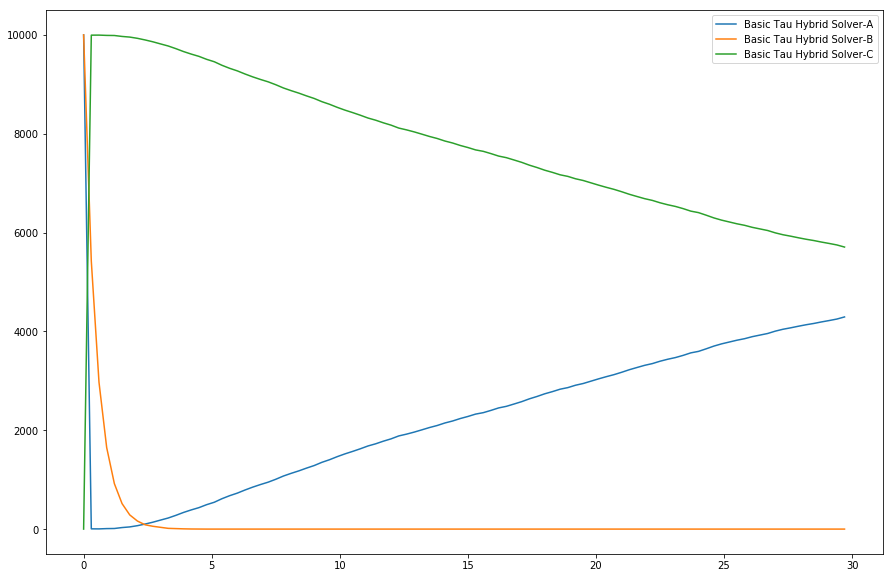

In [18]:
plt.figure(figsize=(15, 10))
for solver in solvers:
    for trajectory in results[solver]:
        for species in trajectory:
            if species == 'time': continue
            plt.plot(results[solver][0]['time'], results[solver][0][species], label='{0}-{1}'.format(solver.name, species))
    plt.legend(loc='best')

In [19]:
print(results[BasicTauHybridSolver][0]['A'])

[10000, 5, 4, 10, 12, 31, 44, 69, 102, 139, 182, 224, 278, 337, 388, 434, 494, 543, 615, 676, 728, 791, 849, 901, 949, 1008, 1074, 1128, 1178, 1234, 1286, 1351, 1404, 1466, 1522, 1572, 1625, 1682, 1726, 1779, 1826, 1885, 1921, 1962, 2008, 2055, 2096, 2147, 2187, 2237, 2279, 2327, 2356, 2402, 2452, 2484, 2531, 2579, 2636, 2684, 2738, 2782, 2831, 2863, 2911, 2946, 2993, 3040, 3084, 3125, 3173, 3225, 3270, 3314, 3349, 3397, 3437, 3471, 3515, 3566, 3596, 3648, 3703, 3748, 3785, 3822, 3853, 3894, 3926, 3958, 4006, 4044, 4073, 4105, 4135, 4161, 4192, 4220, 4250, 4293]


In [20]:
print(results[BasicTauHybridSolver][0]['time'])

[0, 0.3000000000000007, 0.6000000000000014, 0.9000000000000021, 1.2000000000000028, 1.5000000000000036, 1.8000000000000043, 2.100000000000005, 2.4000000000000057, 2.7000000000000064, 3.000000000000007, 3.300000000000008, 3.6000000000000085, 3.9000000000000092, 4.20000000000001, 4.500000000000011, 4.800000000000011, 5.100000000000012, 5.400000000000013, 5.7000000000000135, 6.000000000000014, 6.300000000000015, 6.600000000000016, 6.900000000000016, 7.200000000000017, 7.500000000000018, 7.8000000000000185, 8.10000000000002, 8.40000000000002, 8.70000000000002, 9.000000000000021, 9.300000000000022, 9.600000000000023, 9.900000000000023, 10.200000000000024, 10.500000000000025, 10.800000000000026, 11.100000000000026, 11.400000000000027, 11.700000000000028, 12.000000000000028, 12.30000000000003, 12.60000000000003, 12.90000000000003, 13.200000000000031, 13.500000000000032, 13.800000000000033, 14.100000000000033, 14.400000000000034, 14.700000000000035, 15.000000000000036, 15.300000000000036, 15.6